# FLIPKART GRID 4.0

# TEAM - Sharmas'
Team member - Vipul Sharma (Leader), Shruti, Deepali Sharma

# Extract Trends from social media data

## Importing required libraries

In [1]:
import pandas as pd
import tweepy
import itertools
import numpy as np
import re
import random

## Using tweepy library to extract tweets of our any related category from twitter

In [124]:
def printtweetdata(n, ith_tweet):
        print()
        print(f"Tweet {n}:")
        print(f"Username:{ith_tweet[0]}")
        print(f"Description:{ith_tweet[1]}")
        print(f"Location:{ith_tweet[2]}")
        print(f"Following Count:{ith_tweet[3]}")
        print(f"Follower Count:{ith_tweet[4]}")
        print(f"Total Tweets:{ith_tweet[5]}")
        print(f"Retweet Count:{ith_tweet[6]}")
        print(f"Tweet Text:{ith_tweet[7]}")
        print(f"Hashtags Used:{ith_tweet[8]}")
 
 
# function to perform data extraction
def scrape(words, date_since, numtweet):
 
        # Creating DataFrame using pandas
        db = pd.DataFrame(columns=['username',
                                   'description',
                                   'location',
                                   'following',
                                   'followers',
                                   'totaltweets',
                                   'retweetcount',
                                   'text',
                                   'hashtags'])
 
        # We are using .Cursor() to search through twitter for the required tweets.
        # The number of tweets can be restricted using .items(number of tweets)
        list_tweets = []
        for i in words:
            
            tweets = tweepy.Cursor(api.search_tweets,
                                   i, lang="en",
                                   since_id=date_since, 
                                   tweet_mode='extended').items(numtweet)
 
 
        # .Cursor() returns an iterable object. Each item in
        # the iterator has various attributes
        # that you can access to
        # get information about each tweet
            list_tweets += [tweet for tweet in tweets]
 
        # Counter to maintain Tweet Count
        i = 1
 
        # we will iterate over each tweet in the
        # list for extracting information about each tweet
        for tweet in list_tweets:
                username = tweet.user.screen_name
                description = tweet.user.description
                location = tweet.user.location
                following = tweet.user.friends_count
                followers = tweet.user.followers_count
                totaltweets = tweet.user.statuses_count
                retweetcount = tweet.retweet_count
                hashtags = tweet.entities['hashtags']
 
                # Retweets can be distinguished by
                # a retweeted_status attribute,
                # in case it is an invalid reference,
                # except block will be executed
                try:
                        text = tweet.retweeted_status.full_text
                except AttributeError:
                        text = tweet.full_text
                hashtext = list()
                for j in range(0, len(hashtags)):
                        hashtext.append(hashtags[j]['text'])
 
                # Here we are appending all the
                # extracted information in the DataFrame
                ith_tweet = [username, description,
                             location, following,
                             followers, totaltweets,
                             retweetcount, text, hashtext]
                db.loc[len(db)] = ith_tweet
 
                # Function call to print tweet data on screen
                printtweetdata(i, ith_tweet)
                i = i+1
        filename = 'scraped_tweets.csv'
 
        # we will save our database as a CSV file.
        db.to_csv(filename)

## Showing all the extracted tweets

In [125]:
if __name__ == '__main__':
        # The below credentials are developer specific (In this case belongs to Vipul Sharma (Leader of team))
        consumer_key = "B1JtYTM9fiTRcK3ybaSwtXUvp"
        consumer_secret = "rFeoCOXOCWMLFtWD9HttZtx7YK97t3HScakgya0QWk9iQkKaZc"
        access_key = "1551990991707840512-436SiEQld2sddSTw4Y8n7AE0jPlCRF"
        access_secret = "iSAGbeCZZtZHurpd1EuAjW0Pyc7YfZEc1Zs81jxXeCgy6"
 
 
        auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
        auth.set_access_token(access_key, access_secret)
        api = tweepy.API(auth)
 
        print("Enter Twitter HashTag to search for")
        words = input().split()
        print("Enter Date since The Tweets are required in yyyy-mm-dd")
        date_since = input()
 
        numtweet = 50
        scrape(words, date_since, numtweet)
        print('Scraping has completed!')

Enter Twitter HashTag to search for
shirt trouser watch saree sweater
Enter Date since The Tweets are required in yyyy-mm-dd
2022-01-01

Tweet 1:
Username:Original_Ebo
Description:Multimedia Journalist at @Citi973, @CitiSportsGHA || I manage SM account of @AsekemFC || eboosei97@gmail.com
Location:
Following Count:320
Follower Count:895
Total Tweets:14571
Retweet Count:0
Tweet Text:Ah Darwin Nunez nu, is he okay? Removing shirt in a Community Shield?😂😂😂
Hashtags Used:[]

Tweet 2:
Username:raehavertzz
Description:cfc 🇺🇸 reece james is the best rb in the world
Location:Idaho, USA
Following Count:53
Follower Count:9
Total Tweets:324
Retweet Count:0
Tweet Text:@ConnCFC mans rlly took his shirt off
Hashtags Used:[]

Tweet 3:
Username:Iologriffiths07
Description:
Location:
Following Count:1073
Follower Count:27
Total Tweets:297
Retweet Count:0
Tweet Text:Nunez taking his shirt off in a Community Shield match oh my god 💀😭
Hashtags Used:[]

Tweet 4:
Username:kun_aguero9320
Description:
Location

## Importing the dataframe or CSV file containing tweets data

In [2]:
df = pd.read_csv('scraped_tweets.csv')

In [3]:
df.head()

,Unnamed: 0,username,description,location,following,followers,totaltweets,retweetcount,text,hashtags
0,0,Original_Ebo,"Multimedia Journalist at @Citi973, @CitiSports...",NaN,320,895,14571,0,"Ah Darwin Nunez nu, is he okay? Removing shirt...",[]
1,1,raehavertzz,cfc 🇺🇸 reece james is the best rb in the world,"Idaho, USA",53,9,324,0,@ConnCFC mans rlly took his shirt off,[]
2,2,Iologriffiths07,NaN,NaN,1073,27,297,0,Nunez taking his shirt off in a Community Shie...,[]
3,3,kun_aguero9320,NaN,NaN,28,2,230,0,How pathetic is Darwin celebrating by taking h...,[]
4,4,Jennaa_Mufc,"Twitter deactivated my last account 😭😭,please ...",NaN,211,1363,236,0,Nunez taking off his shirt for a friendly?😭😭😭😭...,[]


In [4]:
df.tail()

,Unnamed: 0,username,description,location,following,followers,totaltweets,retweetcount,text,hashtags
245,245,jewelryartist,#Handcraftedjewelry #SterlingSilverJewelry htt...,South Jersey,417,914,16377,0,Check out this listing I just added to my #Pos...,"['Poshmark', 'shopmycloset']"
246,246,teenylino,lino loml ! 🫧,fairy ♡ she / her • 21 • bi,990,2737,25882,1,steve’s yellow sweater 🥰🥰🥰,[]
247,247,MSNFT3,Creativity Enthusiast/ Addicted to Learning /N...,NaN,1497,1243,3699,0,@NFTSaraBaumann @Jake_Joseph Even the crew nec...,[]
248,248,danielschorr7,I am twenty and probably upset right now he/they,"Maryland, USA",1103,170,5856,0,@kyrasversion @bleachersmusic @jackantonoff Ok...,[]
249,249,liveOnWFHB,Posting I Like Japanese Hardcore lyrics every ...,NaN,0,2,217,0,Such a big deal these days and that sweater yo...,[]


In [5]:
df.isnull().sum()


Unnamed: 0        0
username          0
description      36
location        104
following         0
followers         0
totaltweets       0
retweetcount      0
text              0
hashtags          0
dtype: int64

## Storing important columns from dataframe in a list

In [6]:
hashtags = df["hashtags"].tolist()

In [7]:
description = df["description"].tolist()

In [8]:
text = df["text"].tolist()

In [9]:
hashtags

['[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 "['Mensfashion']",
 "['Nunez', 'LiverpoolFC']",
 '[]',
 '[]',
 '[]',
 '[]',
 "['SOJUNGHWAN', '소정환', 'TREASURE']",
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 "['Suits', 'AbujaCommunity', 'abujatwittercommunity', 'AbujaFashionWeek', 'fashion', 'fashionblogger', 'Fashionista', 'FashionPhotography', 'careergoals']",
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 "['NowPlaying', 'TranceFamily', 'Trance']",
 '[]',
 '[]',
 '[]',
 '[]',
 "['Delicioussews', 'SewingTwitter', 'BBNaija', 'GistLoverStory', 'FreakyGirl', 'Kimono', 'Onlinefashionschool', 'Sew']",
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',


## Making the entries of hashtags into lists from strings

In [10]:
for i in range(len(hashtags)):
    hashtags[i] = hashtags[i].strip('][').split(', ')

In [11]:
hashtags

[[''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 ["'Mensfashion'"],
 ["'Nunez'", "'LiverpoolFC'"],
 [''],
 [''],
 [''],
 [''],
 ["'SOJUNGHWAN'", "'소정환'", "'TREASURE'"],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 ["'Suits'",
  "'AbujaCommunity'",
  "'abujatwittercommunity'",
  "'AbujaFashionWeek'",
  "'fashion'",
  "'fashionblogger'",
  "'Fashionista'",
  "'FashionPhotography'",
  "'careergoals'"],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 ["'NowPlaying'", "'TranceFamily'", "'Trance'"],
 [''],
 [''],
 [''],
 [''],
 ["'Delicioussews'",
  "'SewingTwitter'",
  "'BBNaija'",
  "'GistLoverStory'",
  "'FreakyGirl'",
  "'Kimono'",
  "'Onlinefashionschool'",
  "'Sew'"],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],


In [12]:
def stringToListFormat(lst):
    hashtag = []
    for i in range(len(lst)):
        hashtag.append([])
        for j in lst[i]:
            j = j[1:-1]
            hashtag[i].append(j)
    return hashtag

In [13]:
hashtags = stringToListFormat(hashtags)

In [14]:
hashtags

[[''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 ['Mensfashion'],
 ['Nunez', 'LiverpoolFC'],
 [''],
 [''],
 [''],
 [''],
 ['SOJUNGHWAN', '소정환', 'TREASURE'],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 ['Suits',
  'AbujaCommunity',
  'abujatwittercommunity',
  'AbujaFashionWeek',
  'fashion',
  'fashionblogger',
  'Fashionista',
  'FashionPhotography',
  'careergoals'],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 ['NowPlaying', 'TranceFamily', 'Trance'],
 [''],
 [''],
 [''],
 [''],
 ['Delicioussews',
  'SewingTwitter',
  'BBNaija',
  'GistLoverStory',
  'FreakyGirl',
  'Kimono',
  'Onlinefashionschool',
  'Sew'],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 ['

## Remove tweets which doesn't have hashtags

In [15]:
def remove_items(test_list, test_list1, test_list2, item):
    res, res1, res2 = [],[],[]
    for i in range(len(test_list)):
        if test_list[i] != item:
            res.append(test_list[i])
            res1.append(test_list1[i])
            res2.append(test_list2[i])
            
    
    return [res,res1,res2]

In [16]:
res = remove_items(hashtags, description,text, [''])
hashtags = res[0]
description = res[1]
text = res[2]

In [17]:
hashtags

[['Mensfashion'],
 ['Nunez', 'LiverpoolFC'],
 ['SOJUNGHWAN', '소정환', 'TREASURE'],
 ['Suits',
  'AbujaCommunity',
  'abujatwittercommunity',
  'AbujaFashionWeek',
  'fashion',
  'fashionblogger',
  'Fashionista',
  'FashionPhotography',
  'careergoals'],
 ['NowPlaying', 'TranceFamily', 'Trance'],
 ['Delicioussews',
  'SewingTwitter',
  'BBNaija',
  'GistLoverStory',
  'FreakyGirl',
  'Kimono',
  'Onlinefashionschool',
  'Sew'],
 ['GogoSkhotheni'],
 ['UnderwaterDiving'],
 ['ManCity', 'LIVMCI', 'CommunityShield'],
 ['TXTPALOOZA', 'TXT'],
 ['Spa24h', 'WRT', 'GTWorldChEu'],
 ['Cobalt'],
 ['Ajithkumar', 'AK61'],
 ['LIVMCI', 'CommunityShield'],
 ['TheLegendSaravanan'],
 ['JacksonWang', 'Cruel'],
 ['KDLex', 'KDEstrada', 'AlexaIlacad', 'DarrenEspanto'],
 ['EndTigrayGenocide'],
 ['TejasswiPrakash', 'ShehnaazGill'],
 ['JanhviKapoor'],
 ['TejasswiPrakash', 'ShehnaazGill'],
 ['TejasswiPrakash', 'ShehnaazGill'],
 ['TejasswiPrakash', 'ShehnaazGill'],
 ['TejasswiPrakash', 'ShehnaazGill'],
 ['TejasswiPr

## Extracting trend information from tweet text and description

## (Goal of Deliverable 1)

In [18]:
all_categories = ["polo","shirt","tshirt","t-shirt","formal","casual","trouser", "pant", "jeans","shorts","cargos","kurta","kurti","saree","lehenga","legging","jeans","nightsuit","shoes","sandal","slippers","heels","flipflops","sandal","slippers","watch","jacket","sweatshirt","sweater"]

In [19]:
content = []
for i in text:
    for j in all_categories:
        if j in i.lower():
            content.append(j)

for i in description:
    for j in all_categories:
        try:
            if j in i.lower():
                content.append(j)
        except:
            pass     
random.shuffle(content)

In [20]:
content

['saree',
 'sweater',
 'saree',
 'saree',
 'saree',
 'watch',
 'watch',
 'saree',
 'saree',
 'saree',
 'saree',
 'sweater',
 'trouser',
 'watch',
 'jacket',
 'watch',
 'saree',
 'saree',
 'sweater',
 'shirt',
 'saree',
 'shirt',
 'saree',
 'saree',
 'saree',
 'saree',
 'sweater',
 'sweater',
 'saree',
 'saree',
 'watch',
 'saree',
 'saree',
 'pant',
 'saree',
 'sweater',
 'saree',
 'watch',
 'saree',
 'saree',
 'shirt',
 'polo',
 'saree',
 'saree',
 'saree',
 'sweater',
 'saree',
 'trouser',
 'saree',
 'saree',
 'saree',
 'saree',
 'saree',
 'sweater',
 'jacket',
 'trouser']

## Extracting all keywords from hashkeys

In [21]:
pip install pipe

Note: you may need to restart the kernel to use updated packages.


In [22]:
from pipe import chain
hash_keywords = list(hashtags|chain)

In [23]:
final_trending_keywords = content + hash_keywords 
final_trending_keywords


['saree',
 'sweater',
 'saree',
 'saree',
 'saree',
 'watch',
 'watch',
 'saree',
 'saree',
 'saree',
 'saree',
 'sweater',
 'trouser',
 'watch',
 'jacket',
 'watch',
 'saree',
 'saree',
 'sweater',
 'shirt',
 'saree',
 'shirt',
 'saree',
 'saree',
 'saree',
 'saree',
 'sweater',
 'sweater',
 'saree',
 'saree',
 'watch',
 'saree',
 'saree',
 'pant',
 'saree',
 'sweater',
 'saree',
 'watch',
 'saree',
 'saree',
 'shirt',
 'polo',
 'saree',
 'saree',
 'saree',
 'sweater',
 'saree',
 'trouser',
 'saree',
 'saree',
 'saree',
 'saree',
 'saree',
 'sweater',
 'jacket',
 'trouser',
 'Mensfashion',
 'Nunez',
 'LiverpoolFC',
 'SOJUNGHWAN',
 '소정환',
 'TREASURE',
 'Suits',
 'AbujaCommunity',
 'abujatwittercommunity',
 'AbujaFashionWeek',
 'fashion',
 'fashionblogger',
 'Fashionista',
 'FashionPhotography',
 'careergoals',
 'NowPlaying',
 'TranceFamily',
 'Trance',
 'Delicioussews',
 'SewingTwitter',
 'BBNaija',
 'GistLoverStory',
 'FreakyGirl',
 'Kimono',
 'Onlinefashionschool',
 'Sew',
 'GogoSkho

## Extract all links data from the tweets

In [24]:
def getLinks(file):
    urlLinks = []
    for line in file:
        try:
            if (re.findall('https?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+', line))[0]!='https://t.co':
                urls = re.findall('https?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+', line)
            else:
                urls = re.findall('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+',line)
            urlLinks.append(urls)
        except:
            pass
    return urlLinks

In [25]:
link_dict = {}
for i in range(len(hashtags)):
    for j in hashtags[i]:
        if j not in link_dict:
            link_dict[j] = getLinks([description[i],text[i]])
        else:
            link_dict[j] += getLinks([description[i],text[i]])
link_dict
    

{'Mensfashion': [['https://t.co/6mL10lzi7t'],
  ['https://t.co/lHcfNciPfA', 'https://t.co/aEglh7CPMV']],
 'Nunez': [],
 'LiverpoolFC': [],
 'SOJUNGHWAN': [],
 '소정환': [],
 'TREASURE': [],
 'Suits': [['https://t.co/zmnbC3o5Ji']],
 'AbujaCommunity': [['https://t.co/zmnbC3o5Ji']],
 'abujatwittercommunity': [['https://t.co/zmnbC3o5Ji']],
 'AbujaFashionWeek': [['https://t.co/zmnbC3o5Ji']],
 'fashion': [['https://t.co/zmnbC3o5Ji']],
 'fashionblogger': [['https://t.co/zmnbC3o5Ji']],
 'Fashionista': [['https://t.co/zmnbC3o5Ji']],
 'FashionPhotography': [['https://t.co/zmnbC3o5Ji']],
 'careergoals': [['https://t.co/zmnbC3o5Ji']],
 'NowPlaying': [['https://t.co/Gd9nLgJhCD', 'https://t.co/VEivBsGArJ']],
 'TranceFamily': [['https://t.co/Gd9nLgJhCD', 'https://t.co/VEivBsGArJ']],
 'Trance': [['https://t.co/Gd9nLgJhCD', 'https://t.co/VEivBsGArJ']],
 'Delicioussews': [['https://t.co/XtzHaBrQAo']],
 'SewingTwitter': [['https://t.co/XtzHaBrQAo']],
 'BBNaija': [['https://t.co/XtzHaBrQAo']],
 'GistLoverSto

## Extracting trend score by analyzing word frequency data  

## (Goal of Deliverable 1)

For trend score we are using word occurance frequency in the tweet data for scoring them

In [26]:
def addInFreqDict(f, string):
    if string not in frequency_dict:
        f[string] = 1
    else:
        f[string] += 1

In [27]:
frequency_dict = {}
for i in final_trending_keywords:
    if i not in frequency_dict:
        frequency_dict[i] = 1
    else:
        frequency_dict[i] += 1
frequency_dict

{'saree': 32,
 'sweater': 10,
 'watch': 6,
 'trouser': 3,
 'jacket': 4,
 'shirt': 3,
 'pant': 1,
 'polo': 1,
 'Mensfashion': 1,
 'Nunez': 1,
 'LiverpoolFC': 1,
 'SOJUNGHWAN': 1,
 '소정환': 1,
 'TREASURE': 1,
 'Suits': 1,
 'AbujaCommunity': 1,
 'abujatwittercommunity': 1,
 'AbujaFashionWeek': 1,
 'fashion': 1,
 'fashionblogger': 1,
 'Fashionista': 1,
 'FashionPhotography': 1,
 'careergoals': 1,
 'NowPlaying': 1,
 'TranceFamily': 1,
 'Trance': 1,
 'Delicioussews': 1,
 'SewingTwitter': 1,
 'BBNaija': 1,
 'GistLoverStory': 1,
 'FreakyGirl': 1,
 'Kimono': 1,
 'Onlinefashionschool': 1,
 'Sew': 1,
 'GogoSkhotheni': 1,
 'UnderwaterDiving': 1,
 'ManCity': 1,
 'LIVMCI': 2,
 'CommunityShield': 2,
 'TXTPALOOZA': 1,
 'TXT': 1,
 'Spa24h': 1,
 'WRT': 1,
 'GTWorldChEu': 1,
 'Cobalt': 1,
 'Ajithkumar': 1,
 'AK61': 1,
 'TheLegendSaravanan': 1,
 'JacksonWang': 1,
 'Cruel': 1,
 'KDLex': 1,
 'KDEstrada': 1,
 'AlexaIlacad': 1,
 'DarrenEspanto': 1,
 'EndTigrayGenocide': 1,
 'TejasswiPrakash': 25,
 'ShehnaazGill

## Formatting the data in the format :[{Category, <list of links/images>,trending score}                            
## (Goal of Deliverable 1)

In [28]:
trends = []
for i in frequency_dict:
    try:
        trends.append([i,link_dict[i],frequency_dict[i]])
    except:
        trends.append([i,[],frequency_dict[i]])
trends

[['saree', [], 32],
 ['sweater',
  [['http://t.co', 'http://t.co'],
   ['https://t.co/Weza8yPPTx'],
   ['https://t.co/Q89W0XjVvJ']],
  10],
 ['watch', [], 6],
 ['trouser', [], 3],
 ['jacket',
  [['http://t.co', 'http://t.co'],
   ['https://t.co/Weza8yPPTx'],
   ['https://t.co/Q89W0XjVvJ']],
  4],
 ['shirt', [], 3],
 ['pant', [], 1],
 ['polo', [], 1],
 ['Mensfashion',
  [['https://t.co/6mL10lzi7t'],
   ['https://t.co/lHcfNciPfA', 'https://t.co/aEglh7CPMV']],
  1],
 ['Nunez', [], 1],
 ['LiverpoolFC', [], 1],
 ['SOJUNGHWAN', [], 1],
 ['소정환', [], 1],
 ['TREASURE', [], 1],
 ['Suits', [['https://t.co/zmnbC3o5Ji']], 1],
 ['AbujaCommunity', [['https://t.co/zmnbC3o5Ji']], 1],
 ['abujatwittercommunity', [['https://t.co/zmnbC3o5Ji']], 1],
 ['AbujaFashionWeek', [['https://t.co/zmnbC3o5Ji']], 1],
 ['fashion', [['https://t.co/zmnbC3o5Ji']], 1],
 ['fashionblogger', [['https://t.co/zmnbC3o5Ji']], 1],
 ['Fashionista', [['https://t.co/zmnbC3o5Ji']], 1],
 ['FashionPhotography', [['https://t.co/zmnbC3o5Ji

In [29]:
for i in range(len(trends)):
    trends[i] = [trends[i][0],list(itertools.chain.from_iterable(trends[i][1])),trends[i][2]]
trends

[['saree', [], 32],
 ['sweater',
  ['http://t.co',
   'http://t.co',
   'https://t.co/Weza8yPPTx',
   'https://t.co/Q89W0XjVvJ'],
  10],
 ['watch', [], 6],
 ['trouser', [], 3],
 ['jacket',
  ['http://t.co',
   'http://t.co',
   'https://t.co/Weza8yPPTx',
   'https://t.co/Q89W0XjVvJ'],
  4],
 ['shirt', [], 3],
 ['pant', [], 1],
 ['polo', [], 1],
 ['Mensfashion',
  ['https://t.co/6mL10lzi7t',
   'https://t.co/lHcfNciPfA',
   'https://t.co/aEglh7CPMV'],
  1],
 ['Nunez', [], 1],
 ['LiverpoolFC', [], 1],
 ['SOJUNGHWAN', [], 1],
 ['소정환', [], 1],
 ['TREASURE', [], 1],
 ['Suits', ['https://t.co/zmnbC3o5Ji'], 1],
 ['AbujaCommunity', ['https://t.co/zmnbC3o5Ji'], 1],
 ['abujatwittercommunity', ['https://t.co/zmnbC3o5Ji'], 1],
 ['AbujaFashionWeek', ['https://t.co/zmnbC3o5Ji'], 1],
 ['fashion', ['https://t.co/zmnbC3o5Ji'], 1],
 ['fashionblogger', ['https://t.co/zmnbC3o5Ji'], 1],
 ['Fashionista', ['https://t.co/zmnbC3o5Ji'], 1],
 ['FashionPhotography', ['https://t.co/zmnbC3o5Ji'], 1],
 ['careergoals

## Natural Language Processing to create meaningful searchable terms on Flipkart from trends data

## (Goal of Deliverable 2)

## Method 1: To extract keywords from a bunch of words using NLTK Open Source Library

In [31]:
from nltk.corpus import words
from nltk.corpus import stopwords



In [32]:
#list of all words from english dictionary
words = words.words()

#list of all english stopwords
stops = list(set(stopwords.words('english')))

alphabets = [chr(x) for x in range(ord('a'), ord('z') + 1)]
cleaned_word_list = list(set(words)|set(stops))
cleaned_word_list = list(set(cleaned_word_list)|set(alphabets))
cleaned_word_dict = dict((i, 0) for i in cleaned_word_list)

def extract_words(x):
    res = []
    subs = [x[i:j+1] for i in range(len(x)) for j in range(i,len(x))if (i - (j+1)) < -1]
    for sub in subs:
        try:
            l = cleaned_word_dict[sub]
            res.append(str(sub))
        except:
            pass
    
    return sorted(res, key = len, reverse=True)

common_words_dict = dict((i, extract_words(str(i))[:2]) for i in list(frequency_dict))

In [33]:
common_words_dict

{'saree': ['sare', 'sar'],
 'sweater': ['sweater', 'sweat'],
 'watch': ['watch', 'wat'],
 'trouser': ['trouser', 'trouse'],
 'jacket': ['jacket', 'jack'],
 'shirt': ['shirt', 'shi'],
 'pant': ['pant', 'pan'],
 'polo': ['polo', 'pol'],
 'Mensfashion': ['fashion', 'fash'],
 'Nunez': ['un', 'ne'],
 'LiverpoolFC': ['pool', 'Liv'],
 'SOJUNGHWAN': [],
 '소정환': [],
 'TREASURE': [],
 'Suits': ['Sui', 'its'],
 'AbujaCommunity': ['munity', 'unity'],
 'abujatwittercommunity': ['community', 'atwitter'],
 'AbujaFashionWeek': ['Abu', 'ash'],
 'fashion': ['fashion', 'fash'],
 'fashionblogger': ['fashion', 'logger'],
 'Fashionista': ['ash', 'shi'],
 'FashionPhotography': ['otography', 'graphy'],
 'careergoals': ['career', 'care'],
 'NowPlaying': ['laying', 'ayin'],
 'TranceFamily': ['rance', 'Tran'],
 'Trance': ['rance', 'Tran'],
 'Delicioussews': ['Delicious', 'Del'],
 'SewingTwitter': ['witter', 'wing'],
 'BBNaija': ['ai'],
 'GistLoverStory': ['over', 'tory'],
 'FreakyGirl': ['reak', 'rea'],
 'Kimono

## Mapping the social media trending data with category and sub-categories present in flipkart 

## (Goal of Deliverable 2)

In [34]:
mapping = {"Men Top Wear":["polo","shirt","tshirt","t-shirt","formal","casual"], 
           "Men Bottom Wear":["trouser", "pant", "jeans","shorts","cargos"], 
           "Women Ethnic":["kurta","kurti","saree","lehenga","legging"], 
           "Women Western":["jeans","nightsuit"], 
           "Men footwear":["shoes","sandal","slippers"], 
           "Women footwear":["heels","flipflops","sandal","slippers"], 
           "Watch":["watch"],
           "Winter":["jacket","sweatshirt","sweater"]}

In [35]:
mapping

{'Men Top Wear': ['polo', 'shirt', 'tshirt', 't-shirt', 'formal', 'casual'],
 'Men Bottom Wear': ['trouser', 'pant', 'jeans', 'shorts', 'cargos'],
 'Women Ethnic': ['kurta', 'kurti', 'saree', 'lehenga', 'legging'],
 'Women Western': ['jeans', 'nightsuit'],
 'Men footwear': ['shoes', 'sandal', 'slippers'],
 'Women footwear': ['heels', 'flipflops', 'sandal', 'slippers'],
 'Watch': ['watch'],
 'Winter': ['jacket', 'sweatshirt', 'sweater']}

In [36]:
def get_key(val, my_dict):
    for key, value in my_dict.items():
         if val in value:
                return key

In [37]:
sub_categories = []
for i in mapping:
    for j in mapping[i]:
        sub_categories.append(j)
        

## Graphical display of most trending sub-categories

## (Goal of Deliverable 2)

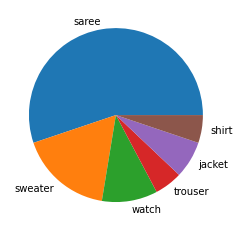

In [38]:
import matplotlib.pyplot as plt
trend_data = {}
for i in frequency_dict:
    if frequency_dict[i]>=2 and i in sub_categories:
        trend_data[i] = frequency_dict[i]


plt.pie([float(trend_data[v]) for v in trend_data], labels=[str(k) for k in trend_data])
plt.show()

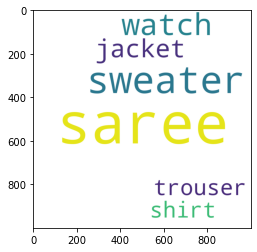

In [46]:
from PIL import Image
from wordcloud import WordCloud
wordC = {}
for i in frequency_dict:
    if frequency_dict[i]>=3 and i in sub_categories:
        wordC[i] = frequency_dict[i]
wc = WordCloud(background_color="white",width=1000,height=1000, max_words=10,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(wordC)
plt.imshow(wc)

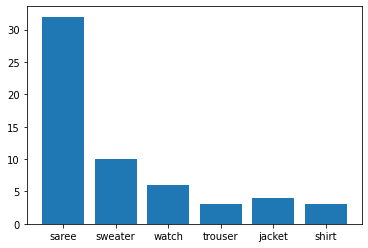

In [48]:
names = list(wordC.keys())
values = list(wordC.values())

plt.bar(range(len(wordC)), values, tick_label=names)
plt.show()

## Formatting the data in the format :{category: Fashion, Sub-category: Women Western, vertical: Women dresses, search page links: https://t.co/EoNIrxMsHL}

## (Goal of Deliverable 2)

In [49]:
mapped_trends = []

In [50]:
for i in common_words_dict:
    for j in common_words_dict[i]:
        if j in sub_categories:
            x = ["https://www.google.com/search?q="+j+"&tbm=isch&ved=2ahUKEwim89LW-KD5AhWti9gFHSaeBDcQ2-cCegQIABAA&oq=shirt&gs_lcp=CgNpbWcQAzIECAAQQzIHCAAQsQMQQzIHCAAQsQMQQzIECAAQQzIECAAQQzIECAAQQzIKCAAQsQMQgwEQQzIHCAAQsQMQQzIECAAQQzIECAAQQzoFCAAQgAQ6CwgAEIAEELEDEIMBOggIABCxAxCDAToICAAQgAQQsQNQlgVY1zxgyz9oAHAAeACAAZwBiAGtBpIBAzAuNpgBAKABAaoBC2d3cy13aXotaW1nsAEAwAEB&sclient=img&ei=MFDlYqabEa2X4t4PprySuAM&bih=726&biw=1536"]
            if j in link_dict:
                x = link_dict[j]
            mapped_trends.append({"Category":"Fashion", 
                                 "Sub-category": get_key(j,mapping),
                                 "Vertical": j,
                                 "Search Page Links": x})

In [51]:
mapped_trends

[{'Category': 'Fashion',
  'Sub-category': 'Winter',
  'Vertical': 'sweater',
  'Search Page Links': [['http://t.co', 'http://t.co'],
   ['https://t.co/Weza8yPPTx'],
   ['https://t.co/Q89W0XjVvJ']]},
 {'Category': 'Fashion',
  'Sub-category': 'Watch',
  'Vertical': 'watch',
  'Search Page Links': ['https://www.google.com/search?q=watch&tbm=isch&ved=2ahUKEwim89LW-KD5AhWti9gFHSaeBDcQ2-cCegQIABAA&oq=shirt&gs_lcp=CgNpbWcQAzIECAAQQzIHCAAQsQMQQzIHCAAQsQMQQzIECAAQQzIECAAQQzIECAAQQzIKCAAQsQMQgwEQQzIHCAAQsQMQQzIECAAQQzIECAAQQzoFCAAQgAQ6CwgAEIAEELEDEIMBOggIABCxAxCDAToICAAQgAQQsQNQlgVY1zxgyz9oAHAAeACAAZwBiAGtBpIBAzAuNpgBAKABAaoBC2d3cy13aXotaW1nsAEAwAEB&sclient=img&ei=MFDlYqabEa2X4t4PprySuAM&bih=726&biw=1536']},
 {'Category': 'Fashion',
  'Sub-category': 'Men Bottom Wear',
  'Vertical': 'trouser',
  'Search Page Links': ['https://www.google.com/search?q=trouser&tbm=isch&ved=2ahUKEwim89LW-KD5AhWti9gFHSaeBDcQ2-cCegQIABAA&oq=shirt&gs_lcp=CgNpbWcQAzIECAAQQzIHCAAQsQMQQzIHCAAQsQMQQzIECAAQQzIECAAQQzIECAA

## Method 2: To extract keywords from a bunch of words using Yake Open Source Library

In [96]:
pip install yake

Note: you may need to restart the kernel to use updated packages.


In [52]:
import yake
kw_extractor = yake.KeywordExtractor()
text = "tropical tops"
language = "en"
max_ngram_size = 3
deduplication_threshold = 0.9
numOfKeywords = 20
custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_threshold, top=numOfKeywords, features=None)
keywords = custom_kw_extractor.extract_keywords(text)
keyword = []
for kw in keywords:
    keyword.append(kw)
print(keyword)

[('tropical tops', 0.02570861714399338), ('tropical', 0.15831692877998726), ('tops', 0.15831692877998726)]


## Method 3: To extract keywords from a bunch of words using Rake Open Source Library

In [114]:
pip install rake_nltk

  Using cached rake_nltk-1.0.6-py3-none-any.whl (9.1 kB)
  Using cached nltk-3.7-py3-none-any.whl (1.5 MB)
  Attempting uninstall: nltk
    Found existing installation: nltk 3.6.1
    Uninstalling nltk-3.6.1:
      Successfully uninstalled nltk-3.6.1
Note: you may need to restart the kernel to use updated packages.


In [53]:
from rake_nltk import Rake
rake_nltk_var = Rake()
text = "tropical top and jeans"
rake_nltk_var.extract_keywords_from_text(text)
keyword_extracted = rake_nltk_var.get_ranked_phrases()
print(keyword_extracted)

['tropical top', 'jeans']


## Conclusion

The project has successfully taken tweets from twitter and uses many data cleaning techniques in order to filter out the data which are not relevant with respect to finding trend related to the category of our choice (Fashion in our project). 

The project focuses on 2 deliverables and completes both of them to give a complete product of utmost reliability in order to detect trend related to Flipkart and mapping it to their relevant category and sub-category on flipkart website. 

The project also uses 3 different methods of Natural Language Processing using libraries like NLTK, Yake and Rake in order to derive meaningful insights or keywords from all sort of text data and which can be later utilized for mapping with the flipkart derived sub-categories of data as shown with 1st Method of NLTK. 

The program has also used pie chart to represent the trend data derived from social media in form of graphical representation.